In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1=pd.read_csv('Updated_RealEstate_Mumbai (1).csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,adjusted_price
0,Super built-up Area,19-Dec,Khar,2 BHK,Coomee,1056,2.0,1.0,35612.08267,35612.08267
1,Plot Area,Ready To Move,Worli,4 Bedroom,Theanmp,2600,5.0,3.0,35934.29158,35934.29158
2,Built-up Area,Ready To Move,Goregaon,3 BHK,NaN,1440,2.0,3.0,32747.93388,32747.93388
3,Super built-up Area,Ready To Move,Worli,3 BHK,Soiewre,1521,3.0,1.0,29729.72973,29729.72973
4,Super built-up Area,Ready To Move,Dadar,2 BHK,NaN,1200,2.0,1.0,12385.32110,14862.38532


In [4]:
df1.shape

(13320, 10)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price,adjusted_price
0,Khar,2 BHK,1056,2.0,35612.08267,35612.08267
1,Worli,4 Bedroom,2600,5.0,35934.29158,35934.29158
2,Goregaon,3 BHK,1440,2.0,32747.93388,32747.93388
3,Worli,3 BHK,1521,3.0,29729.72973,29729.72973
4,Dadar,2 BHK,1200,2.0,12385.32110,14862.38532


In [7]:
df2.isnull().sum()

location           0
size              16
total_sqft         0
bath              73
price              0
adjusted_price     0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
adjusted_price    0
dtype: int64

In [9]:
df3.shape

(13247, 6)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

C:\Users\sayud\AppData\Local\Temp\ipykernel_5376\2487300557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,adjusted_price,bhk
0,Khar,2 BHK,1056,2.0,35612.08267,35612.08267,2
1,Worli,4 Bedroom,2600,5.0,35934.29158,35934.29158,4
2,Goregaon,3 BHK,1440,2.0,32747.93388,32747.93388,3
3,Worli,3 BHK,1521,3.0,29729.72973,29729.72973,3
4,Dadar,2 BHK,1200,2.0,12385.32110,14862.38532,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,adjusted_price,bhk
1718,Chembur,27 BHK,8000,27.0,21367.521370,21367.521370,27
4684,Colaba,43 Bedroom,2400,40.0,5684.210526,7389.473684,43


In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head()


,location,size,total_sqft,bath,price,adjusted_price,bhk
30,Mulund,4 BHK,2100 - 2850,4.0,26127.61276,26127.61276,4
122,Goregaon,4 BHK,3067 - 8156,4.0,33298.64724,33298.64724,4
137,Borivali,2 BHK,1042 - 1105,2.0,45592.70517,45592.70517,2
165,Bandra,2 BHK,1145 - 1340,2.0,14270.83333,14270.83333,2
188,Mulund,2 BHK,1015 - 1540,2.0,18367.34694,18367.34694,2


In [17]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2100-2850')

2475.0

In [19]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)


,location,size,total_sqft,bath,price,adjusted_price,bhk
0,Khar,2 BHK,1056.0,2.0,35612.08267,35612.08267,2
1,Worli,4 Bedroom,2600.0,5.0,35934.29158,35934.29158,4
2,Goregaon,3 BHK,1440.0,2.0,32747.93388,32747.93388,3


In [20]:
df4.loc[30]

location               Mulund
size                    4 BHK
total_sqft             2475.0
bath                      4.0
price             26127.61276
adjusted_price    26127.61276
bhk                         4
Name: 30, dtype: object

In [21]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,adjusted_price,bhk,price_per_sqft
0,Khar,2 BHK,1056.0,2.0,35612.08267,35612.08267,2,3.372356e+06
1,Worli,4 Bedroom,2600.0,5.0,35934.29158,35934.29158,4,1.382088e+06
2,Goregaon,3 BHK,1440.0,2.0,32747.93388,32747.93388,3,2.274162e+06
3,Worli,3 BHK,1521.0,3.0,29729.72973,29729.72973,3,1.954617e+06
4,Dadar,2 BHK,1200.0,2.0,12385.32110,14862.38532,2,1.032110e+06


In [22]:
len(df5.location.unique())

18

In [23]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Chembur        778
Kurla          774
Andheri        767
Lower Parel    762
Powai          758
Khar           754
Ghatkopar      750
Goregaon       748
Dadar          745
Vile Parle     736
Worli          736
Juhu           726
Malad          719
Santacruz      714
Colaba         704
Bandra         697
Mulund         693
Borivali       686
Name: location, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

0

In [25]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

Series([], Name: location, dtype: int64)

In [26]:
len(df5.location.unique())

18

In [27]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

18

In [28]:
df5.head()

,location,size,total_sqft,bath,price,adjusted_price,bhk,price_per_sqft
0,Khar,2 BHK,1056.0,2.0,35612.08267,35612.08267,2,3.372356e+06
1,Worli,4 Bedroom,2600.0,5.0,35934.29158,35934.29158,4,1.382088e+06
2,Goregaon,3 BHK,1440.0,2.0,32747.93388,32747.93388,3,2.274162e+06
3,Worli,3 BHK,1521.0,3.0,29729.72973,29729.72973,3,1.954617e+06
4,Dadar,2 BHK,1200.0,2.0,12385.32110,14862.38532,2,1.032110e+06


In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,adjusted_price,bhk,price_per_sqft
9,Colaba,6 Bedroom,1020.0,6.0,24846.62577,32300.613501,6,2.435944e+06
45,Worli,8 Bedroom,600.0,9.0,14500.00000,14500.000000,8,2.416667e+06
58,Ghatkopar,6 Bedroom,1407.0,4.0,27422.30347,27422.303470,6,1.948991e+06
68,Mulund,8 Bedroom,1350.0,7.0,25000.00000,25000.000000,8,1.851852e+06
70,Borivali,3 Bedroom,500.0,3.0,11037.03704,11037.037040,3,2.207407e+06


In [30]:
df5.shape

(13247, 8)

In [31]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape


(12503, 8)

In [32]:
df6.price_per_sqft.describe()

count    1.245700e+04
mean     7.742561e+05
std      1.174555e+06
min      5.000000e+02
25%      5.158730e+03
50%      1.291667e+04
75%      1.337386e+06
max      1.714658e+07
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Initialize an empty DataFrame
    # The column is named 'location' not 'Location'
    for key, subdf in df.groupby('location'):  # Group by 'location'
        m = np.mean(subdf.price_per_sqft)  # Calculate mean for the group
        st = np.std(subdf.price_per_sqft)  # Calculate standard deviation for the group
        # Filter rows within one standard deviation of the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        # Concatenate the filtered data into df_out
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape  # This will return the shape of d

(10758, 8)

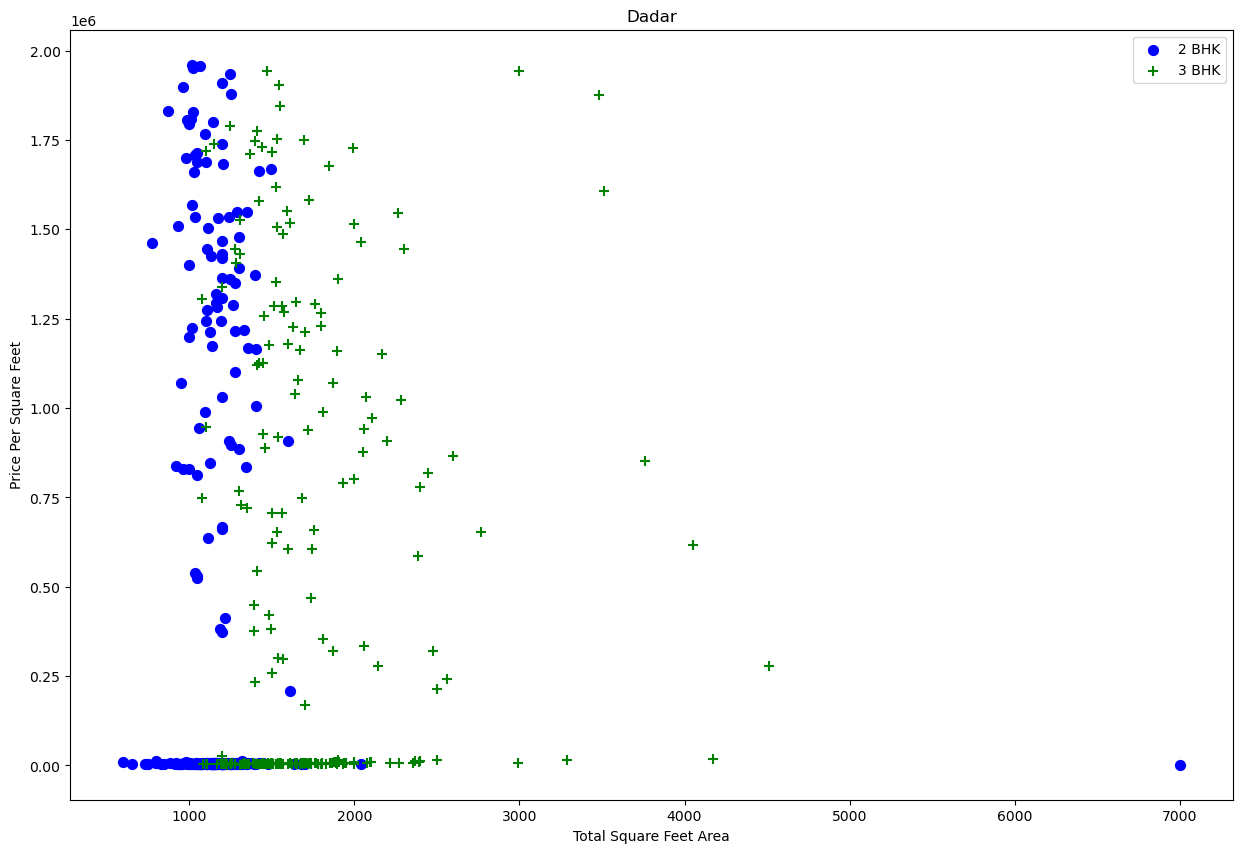

In [34]:
def plot_scatter_chart(df, location):
    # Indented block within the function
    bhk2 = df[(df.location == location) & (df.bhk == 2)]  # Fixed: = to ==
    bhk3 = df[(df.location == location) & (df.bhk == 3)]  # Fixed: = to ==
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Dadar")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])  # Initialize an empty array for indices to be excluded
    for location, location_df in df.groupby('location'):  # Group by 'location'
        bhk_stats = {}
        
        # Calculate mean and std for each BHK in the location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        # Compare each BHK with the previous one
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            # If there's a BHK-1 group and it has enough data points (e.g. more than 5)
            if stats and stats['count'] > 5:
                # Append indices where current BHK's price_per_sqft is less than the mean of the previous BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    
    # Drop rows with indices in exclude_indices and return the filtered dataframe
    return df.drop(exclude_indices, axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(4112, 8)

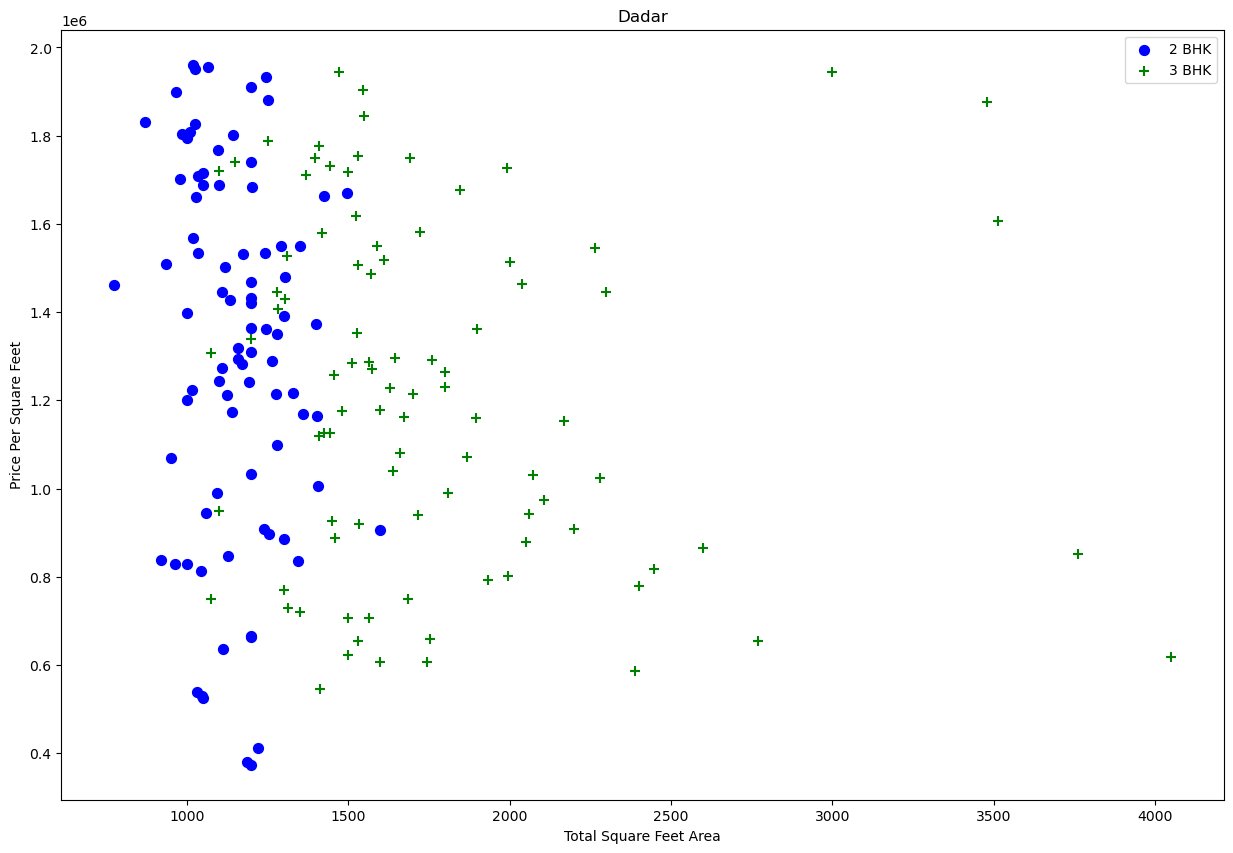

In [36]:
plot_scatter_chart(df8,"Dadar")

Text(0, 0.5, 'Count')

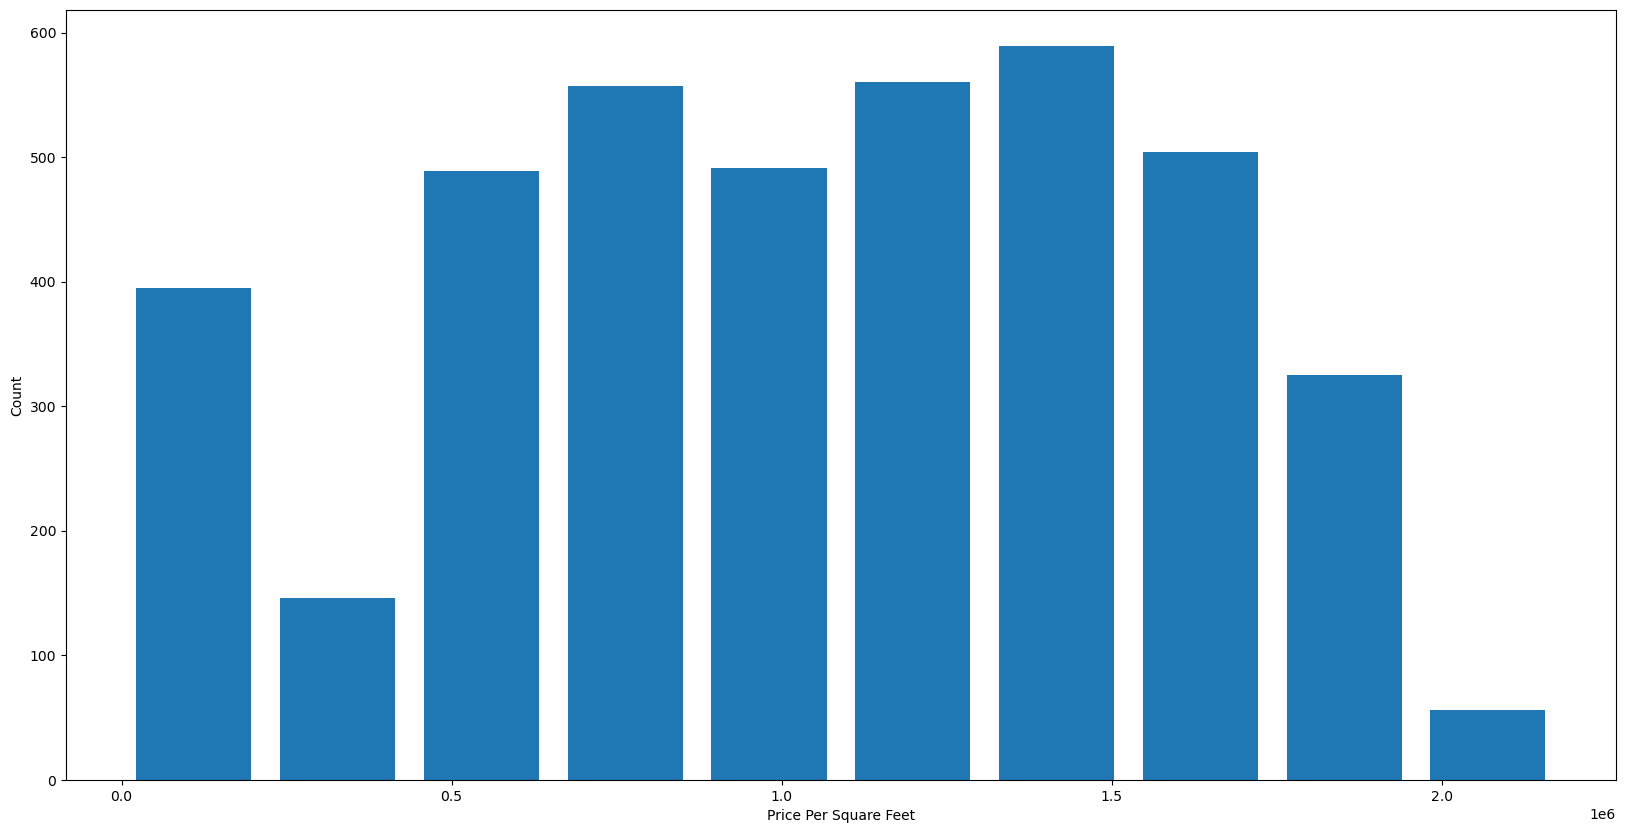

In [37]:
import matplotlib
# Changed 'rcParam' to 'rcParams'
matplotlib.rcParams['figure.figsize'] = (20, 10)  
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
df8.bath.unique()

array([ 5.,  2.,  3.,  7.,  4.,  6.,  1.,  8.,  9., 10., 12., 13., 14.,
       16.])

In [39]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,adjusted_price,bhk,price_per_sqft
4502,Goregaon,11 BHK,6000.0,12.0,150.000000,150.000000,11,2500.000000
4765,Goregaon,10 Bedroom,7150.0,13.0,3600.000000,3600.000000,10,50349.650350
6650,Lower Parel,9 Bedroom,3300.0,14.0,11238.938050,11238.938050,9,340573.880303
6733,Lower Parel,10 BHK,12000.0,12.0,8266.666667,8266.666667,10,68888.888892
6977,Lower Parel,10 BHK,4000.0,12.0,160.000000,160.000000,10,4000.000000
9399,Santacruz,13 BHK,5425.0,13.0,275.000000,275.000000,13,5069.124424
10315,Worli,16 BHK,10000.0,16.0,25252.525250,25252.525250,16,252525.252500


Text(0, 0.5, 'Count')

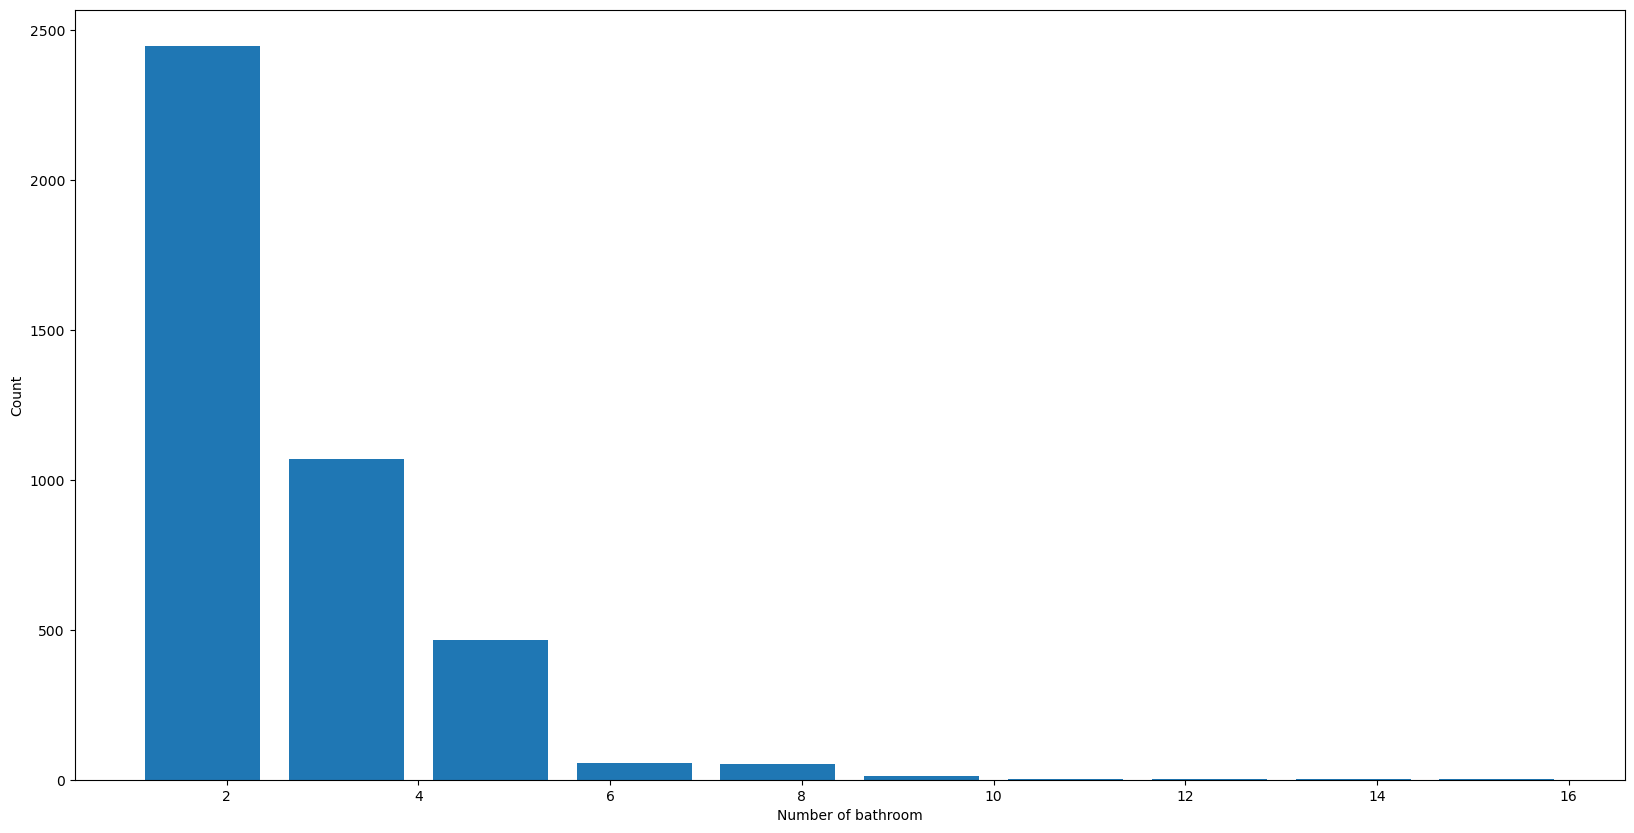

In [40]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [41]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,adjusted_price,bhk,price_per_sqft
4765,Goregaon,10 Bedroom,7150.0,13.0,3600.00000,3600.00000,10,50349.650350
6650,Lower Parel,9 Bedroom,3300.0,14.0,11238.93805,11238.93805,9,340573.880303


In [42]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(4059, 8)

In [43]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,adjusted_price,bhk
0,Andheri,2785.0,5.0,31336.40553,37603.686636,4
1,Andheri,1600.0,2.0,21825.39683,26190.476196,3
2,Andheri,1060.0,2.0,15454.54545,18545.454540,2
3,Andheri,1540.0,3.0,13237.48141,15884.977692,3
6,Andheri,4000.0,7.0,36666.66667,44000.000004,7


In [44]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)


,Andheri,Bandra,Borivali,Chembur,Colaba,Dadar,Ghatkopar,Goregaon,Juhu,Khar,Kurla,Lower Parel,Malad,Mulund,Powai,Santacruz,Vile Parle,Worli
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
import pandas as pd

# Assuming df10 and dummies have already been defined
# dummies = pd.get_dummies(df10.location)

# Check if 'other' column exists in dummies before dropping
if 'other' in dummies.columns:
    # Drop 'other' column and concatenate
    df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
else:
    # Concatenate without dropping any columns if 'other' doesn't exist
    df11 = pd.concat([df10, dummies], axis='columns')

# Display the first few rows of the resulting DataFrame
print(df11.head())


  location  total_sqft  bath        price  adjusted_price  bhk  Andheri  \
0  Andheri      2785.0   5.0  31336.40553    37603.686636    4     True   
1  Andheri      1600.0   2.0  21825.39683    26190.476196    3     True   
2  Andheri      1060.0   2.0  15454.54545    18545.454540    2     True   
3  Andheri      1540.0   3.0  13237.48141    15884.977692    3     True   
6  Andheri      4000.0   7.0  36666.66667    44000.000004    7     True   

   Bandra  Borivali  Chembur  ...   Juhu   Khar  Kurla  Lower Parel  Malad  \
0   False     False    False  ...  False  False  False        False  False   
1   False     False    False  ...  False  False  False        False  False   
2   False     False    False  ...  False  False  False        False  False   
3   False     False    False  ...  False  False  False        False  False   
6   False     False    False  ...  False  False  False        False  False   

   Mulund  Powai  Santacruz  Vile Parle  Worli  
0   False  False      False    

In [46]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,adjusted_price,bhk,Andheri,Bandra,Borivali,Chembur,Colaba,...,Juhu,Khar,Kurla,Lower Parel,Malad,Mulund,Powai,Santacruz,Vile Parle,Worli
0,2785.0,5.0,31336.40553,37603.686636,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1600.0,2.0,21825.39683,26190.476196,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1060.0,2.0,15454.54545,18545.454540,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1540.0,3.0,13237.48141,15884.977692,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,4000.0,7.0,36666.66667,44000.000004,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df12.shape

(4059, 23)

In [48]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,adjusted_price,bhk,Andheri,Bandra,Borivali,Chembur,Colaba,Dadar,...,Juhu,Khar,Kurla,Lower Parel,Malad,Mulund,Powai,Santacruz,Vile Parle,Worli
0,2785.0,5.0,37603.686636,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1600.0,2.0,26190.476196,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1060.0,2.0,18545.454540,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1540.0,3.0,15884.977692,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,4000.0,7.0,44000.000004,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
y=df12.price
y.head()

0    31336.40553
1    21825.39683
2    15454.54545
3    13237.48141
6    36666.66667
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9896889799962207

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.98898024, 0.98877038, 0.9887887 , 0.98883531, 0.98896686])

In [54]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X, y):
    # Define the algorithms and hyperparameters for grid search
    algos = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                # Since 'normalize' is deprecated, we skip it
                # You can normalize the data before passing it to the model
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],  # Hyperparameters for Lasso
                'selection': ['random', 'cyclic']
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Hyperparameters for Decision Tree Regressor
                'splitter': ['best', 'random']
            }
        }
    }

    # To store the results of GridSearchCV for each algorithm
    scores = []
    
    for algo_name, config in algos.items():
        # Set up GridSearchCV with the model and parameters
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, y)  # Fit the grid search model on the data
        
        # Append results
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    # Return the results sorted by the best score in descending order
    return sorted(scores, key=lambda X: X['best_score'], reverse=True)

# Call the function with your data (make sure 'x' and 'y' are defined in your environment)
find_best_model_using_gridsearchcv(X, y)


c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sayud\anaconda3\Lib\site-packages\

[{'model': 'linear regression',
  'best_score': 0.9489980192270249,
  'best_params': {}},
 {'model': 'lasso',
  'best_score': 0.9416870588029054,
  'best_params': {'alpha': 1, 'selection': 'random'}},
 {'model': 'decision tree',
  'best_score': 0.9365444924105153,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

In [55]:
X.columns

Index(['total_sqft', 'bath', 'adjusted_price', 'bhk', 'Andheri', 'Bandra',
       'Borivali', 'Chembur', 'Colaba', 'Dadar', 'Ghatkopar', 'Goregaon',
       'Juhu', 'Khar', 'Kurla', 'Lower Parel', 'Malad', 'Mulund', 'Powai',
       'Santacruz', 'Vile Parle', 'Worli'],
      dtype='object')

In [56]:
import numpy as np

def predict_price(location, sqft, bath, bhk):
    x = np.zeros(len(X.columns))

    try:
        loc_index = np.where(X.columns == location)[0][0]
    except IndexError:
        loc_index = -1

    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [57]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


213.85664711692857

In [58]:
predict_price('Juhu',1000,1,1)

c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-3564.235795952292

In [59]:
import pickle
with open('Mumbai_home_prices_model.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [60]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))